Importando base de dados.

In [15]:
from sklearn import datasets
bc = datasets.load_breast_cancer()

X = bc.data[:, :2] 
y = bc.target

 Pre-processamento (Treino/Teste)

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123, stratify=y)
     

Normalização 

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

Geração do Centróide / Treinando

In [18]:
from sklearn.neighbors import NearestCentroid

cn_model = NearestCentroid()
cn_model.fit(X_train_std, y_train)

cn_model.centroids_

array([[ 0.94557992,  0.48801181],
       [-0.56403013, -0.29109476]])


Plot segundo o centróide

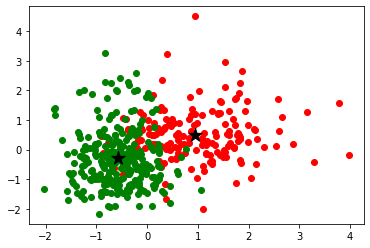

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='r')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='g')
plt.scatter(X_train_std[y_train==2, 0], X_train_std[y_train==2, 1], c='b')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')

Manipulando conjunto de Teste

In [20]:
y_pred = cn_model.predict(X_test_std)
print(y_pred)
print(y_test)

[0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1
 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1]
[0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1
 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1
 1 1 1]


Acurácia / Métrica

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9298245614035088

Plot conjunto Teste

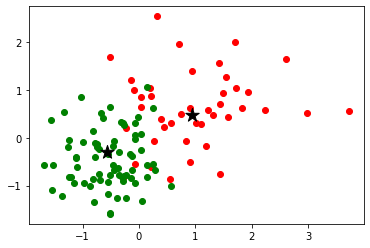

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='r')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='g')
plt.scatter(X_test_std[y_test==2, 0], X_test_std[y_test==2, 1], c='b')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')

Implemtando a Função PREDICT no data base de teste


In [23]:
y_pred = cn_model.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1
 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1
 1 1 1]
